# Train Two-layer Classifier with Pre-extracted Features

The code below is used for testing structures and tuning hyperparameters of last two fully-connected layers, which take extracted features as input, and return the label of each song. 

In this script, different regularization methods are tested and plots of each test result are presented.

In [22]:
import numpy as np
from sklearn.model_selection import train_test_split
import keras
from keras.layers import Input, Dense, merge, Flatten, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import GlobalAveragePooling2D
from keras.models import Model
from kapre.time_frequency import Melspectrogram
from keras.regularizers import l2
import matplotlib.pyplot as plt

## Paths to dataset

Here we directly used output of CNN ("pre-trained convnet feature" vectors) as the input. These vectors are stored as .npy files in `[PATH_TO_HOME]/dataset/data_feats/`. 

The path of each their labels is `[PATH_TO_HOME]/dataset/Y.npy`.

In [23]:
PATH_Xs = ['./dataset/data_feats/gtzan_genre_layer_0.npy',
          './dataset/data_feats/gtzan_genre_layer_1.npy',
          './dataset/data_feats/gtzan_genre_layer_2.npy',
          './dataset/data_feats/gtzan_genre_layer_3.npy',
          './dataset/data_feats/gtzan_genre_layer_4.npy']
          
PATH_Y = './dataset/Y.npy'

## Load Dataset

In [24]:
# Load X
X = np.concatenate([np.load(path) for path in PATH_Xs], axis=1) # Concatenate features from 5 intermediate layers

# Load Y
Y_pre = np.load(PATH_Y)
Y = np.zeros((1000, 10))
Y[np.arange(1000), Y_pre] = 1

# Split Dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

## Models

Here we tested 7 different structures, which are:
- 1-layer without regularization
- 1-layer with L2 regularization
- 2-layer without regularization
- 2-layer with L2 regularization on both layers
- 2-layer with L2 regularizaiton on the first layer
- 2-layer with L2 regularizaiton on the second layer
- 2-layer with dropout

In [6]:
def model_2_layer(lambd=0.1, mid_ns=32):
    '''
    2-layer model without regularizations.
    '''
    x = Input(shape=(160,))

    dense1 = Dense(mid_ns, input_shape=[160], activation='relu')(x)

    out = Dense(10, input_shape=[mid_ns], activation='softmax')(dense1)

    model = Model(input=x, output=out)

    return model


def model_1_layer(lambd=0.1):
    '''
    1-layer model.
    '''
    x = Input(shape=(160,))

    out = Dense(10, input_shape=[160], activation='softmax')(x)
    
    model = Model(input=x, output=out)
    
    return model


def model_1_layer_L2(lambd = 0.01):
    '''
    1-layer model.
    '''
    x = Input(shape=(160,))

    out = Dense(10, input_shape=[160], W_regularizer=l2(lambd), activation='softmax')(x)
    
    model = Model(input=x, output=out)
    
    return model


def model_2_layer_L2(lambd = 0.005, mid_ns=32):
    '''
    2-layer model with xxx regularization.
    '''
    x = Input(shape=(160,))

    dense1 = Dense(mid_ns, input_shape=[160], W_regularizer=l2(lambd), activation='relu')(x)

    out = Dense(10, input_shape=[mid_ns], W_regularizer=l2(lambd), activation='softmax')(dense1)

    model = Model(input=x, output=out)
    
    return model


def model_2_layer_first_L2(lambd = 0.005, mid_ns=32):
    '''
    2-layer model with xxx regularization.
    '''
    x = Input(shape=(160,))

    dense1 = Dense(mid_ns, input_shape=[160], W_regularizer=l2(lambd), activation='relu')(x)

    out = Dense(10, input_shape=[mid_ns], activation='softmax')(dense1)

    model = Model(input=x, output=out)
    
    return model


def model_2_layer_last_L2(lambd = 0.005, mid_ns=32):
    '''
    2-layer model with xxx regularization.
    '''
    x = Input(shape=(160,))

    dense1 = Dense(mid_ns, input_shape=[160], activation='relu')(x)

    out = Dense(10, input_shape=[mid_ns], W_regularizer=l2(lambd), activation='softmax')(dense1)

    model = Model(input=x, output=out)
    
    return model


def model_2_layer_DR(lambd = 0.2, mid_ns=32):
    '''
    2-layer model with xxx regularization.
    '''
    x = Input(shape=(160,))

    dense1 = Dense(mid_ns, input_shape=[160], activation='relu')(x)
    
    dr1 = Dropout(lambd)(dense1)

    out = Dense(10, input_shape=[mid_ns], activation='softmax')(dr1)

    model = Model(input=x, output=out)
    
    return model

In [10]:
model = model_2_layer()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, nb_epoch=1500, verbose=1)

Epoch 1/1500
900/900 [==============================] - 0s - loss: 2.1703 - acc: 0.2411     
Epoch 2/1500
900/900 [==============================] - 0s - loss: 1.7806 - acc: 0.4322     
Epoch 3/1500
900/900 [==============================] - 0s - loss: 1.4832 - acc: 0.5711     
Epoch 4/1500
900/900 [==============================] - 0s - loss: 1.2722 - acc: 0.6522     
Epoch 5/1500
900/900 [==============================] - 0s - loss: 1.1364 - acc: 0.6889     
Epoch 6/1500
900/900 [==============================] - 0s - loss: 1.0389 - acc: 0.7144     
Epoch 7/1500
900/900 [==============================] - 0s - loss: 0.9540 - acc: 0.7289     
Epoch 8/1500
900/900 [==============================] - 0s - loss: 0.8848 - acc: 0.7433     
Epoch 9/1500
900/900 [==============================] - 0s - loss: 0.8236 - acc: 0.7489     
Epoch 10/1500
900/900 [==============================] - 0s - loss: 0.7778 - acc: 0.7822     
Epoch 11/1500
900/900 [==============================] - 0s - loss: 0

900/900 [==============================] - 0s - loss: 0.0348 - acc: 0.9978     
Epoch 175/1500
900/900 [==============================] - 0s - loss: 0.0330 - acc: 0.9967     
Epoch 176/1500
900/900 [==============================] - 0s - loss: 0.0331 - acc: 0.9978     
Epoch 177/1500
900/900 [==============================] - 0s - loss: 0.0310 - acc: 0.9989     
Epoch 178/1500
900/900 [==============================] - 0s - loss: 0.0310 - acc: 0.9967     
Epoch 179/1500
900/900 [==============================] - 0s - loss: 0.0303 - acc: 0.9989     
Epoch 180/1500
900/900 [==============================] - 0s - loss: 0.0292 - acc: 0.9989     
Epoch 181/1500
900/900 [==============================] - 0s - loss: 0.0315 - acc: 0.9978     
Epoch 182/1500
900/900 [==============================] - 0s - loss: 0.0298 - acc: 0.9978     
Epoch 183/1500
900/900 [==============================] - ETA: 0s - loss: 0.0194 - acc: 1.000 - 0s - loss: 0.0287 - acc: 0.9978     
Epoch 184/1500
900/900 [===

900/900 [==============================] - 0s - loss: 0.0134 - acc: 0.9989     
Epoch 261/1500
900/900 [==============================] - 0s - loss: 0.0089 - acc: 1.0000     
Epoch 262/1500
900/900 [==============================] - 0s - loss: 0.0086 - acc: 1.0000     
Epoch 263/1500
900/900 [==============================] - 0s - loss: 0.0087 - acc: 1.0000     
Epoch 264/1500
900/900 [==============================] - 0s - loss: 0.0078 - acc: 1.0000     
Epoch 265/1500
900/900 [==============================] - 0s - loss: 0.0078 - acc: 1.0000     
Epoch 266/1500
900/900 [==============================] - 0s - loss: 0.0080 - acc: 1.0000     
Epoch 267/1500
900/900 [==============================] - 0s - loss: 0.0077 - acc: 1.0000     
Epoch 268/1500
900/900 [==============================] - 0s - loss: 0.0076 - acc: 1.0000     
Epoch 269/1500
900/900 [==============================] - 0s - loss: 0.0076 - acc: 1.0000     
Epoch 270/1500
900/900 [==============================] - 0s - lo

900/900 [==============================] - 0s - loss: 8.0079e-04 - acc: 1.0000     
Epoch 432/1500
900/900 [==============================] - 0s - loss: 7.9169e-04 - acc: 1.0000     
Epoch 433/1500
900/900 [==============================] - 0s - loss: 6.9927e-04 - acc: 1.0000     
Epoch 434/1500
900/900 [==============================] - 0s - loss: 7.0241e-04 - acc: 1.0000     
Epoch 435/1500
900/900 [==============================] - 0s - loss: 6.8292e-04 - acc: 1.0000     
Epoch 436/1500
900/900 [==============================] - 0s - loss: 6.8797e-04 - acc: 1.0000     
Epoch 437/1500
900/900 [==============================] - 0s - loss: 6.4064e-04 - acc: 1.0000     
Epoch 438/1500
900/900 [==============================] - 0s - loss: 6.6579e-04 - acc: 1.0000     
Epoch 439/1500
900/900 [==============================] - 0s - loss: 6.8717e-04 - acc: 1.0000     
Epoch 440/1500
900/900 [==============================] - 0s - loss: 6.5431e-04 - acc: 1.0000     
Epoch 441/1500
900/900 [=

900/900 [==============================] - 0s - loss: 7.2116e-05 - acc: 1.0000     
Epoch 596/1500
900/900 [==============================] - 0s - loss: 7.1161e-05 - acc: 1.0000     
Epoch 597/1500
900/900 [==============================] - 0s - loss: 7.1883e-05 - acc: 1.0000     
Epoch 598/1500
900/900 [==============================] - 0s - loss: 6.8990e-05 - acc: 1.0000     
Epoch 599/1500
900/900 [==============================] - 0s - loss: 7.1940e-05 - acc: 1.0000     
Epoch 600/1500
900/900 [==============================] - 0s - loss: 7.0834e-05 - acc: 1.0000     
Epoch 601/1500
900/900 [==============================] - 0s - loss: 6.4970e-05 - acc: 1.0000     
Epoch 602/1500
900/900 [==============================] - 0s - loss: 6.2275e-05 - acc: 1.0000     
Epoch 603/1500
900/900 [==============================] - 0s - loss: 6.3917e-05 - acc: 1.0000     
Epoch 604/1500
900/900 [==============================] - 0s - loss: 5.9528e-05 - acc: 1.0000     
Epoch 605/1500
900/900 [=

900/900 [==============================] - 0s - loss: 2.6011e-05 - acc: 1.0000     
Epoch 760/1500
900/900 [==============================] - 0s - loss: 2.5955e-05 - acc: 1.0000     
Epoch 761/1500
900/900 [==============================] - 0s - loss: 2.5598e-05 - acc: 1.0000     
Epoch 762/1500
900/900 [==============================] - 0s - loss: 2.5428e-05 - acc: 1.0000     
Epoch 763/1500
900/900 [==============================] - 0s - loss: 2.5190e-05 - acc: 1.0000     
Epoch 764/1500
900/900 [==============================] - 0s - loss: 2.5022e-05 - acc: 1.0000     
Epoch 765/1500
900/900 [==============================] - 0s - loss: 2.4801e-05 - acc: 1.0000     
Epoch 766/1500
900/900 [==============================] - 0s - loss: 2.4632e-05 - acc: 1.0000     
Epoch 767/1500
900/900 [==============================] - 0s - loss: 2.4464e-05 - acc: 1.0000     
Epoch 768/1500
900/900 [==============================] - 0s - loss: 2.4226e-05 - acc: 1.0000     
Epoch 769/1500
900/900 [=

900/900 [==============================] - 0s - loss: 9.9048e-06 - acc: 1.0000     
Epoch 924/1500
900/900 [==============================] - 0s - loss: 9.9850e-06 - acc: 1.0000     
Epoch 925/1500
900/900 [==============================] - 0s - loss: 9.7501e-06 - acc: 1.0000     
Epoch 926/1500
900/900 [==============================] - 0s - loss: 9.7179e-06 - acc: 1.0000     
Epoch 927/1500
900/900 [==============================] - 0s - loss: 9.7206e-06 - acc: 1.0000     
Epoch 928/1500
900/900 [==============================] - 0s - loss: 9.7238e-06 - acc: 1.0000     
Epoch 929/1500
900/900 [==============================] - 0s - loss: 9.5858e-06 - acc: 1.0000     
Epoch 930/1500
900/900 [==============================] - 0s - loss: 9.4795e-06 - acc: 1.0000     
Epoch 931/1500
900/900 [==============================] - 0s - loss: 9.4697e-06 - acc: 1.0000     
Epoch 932/1500
900/900 [==============================] - 0s - loss: 9.3970e-06 - acc: 1.0000     
Epoch 933/1500
900/900 [=

900/900 [==============================] - 0s - loss: 3.2523e-06 - acc: 1.0000     
Epoch 1088/1500
900/900 [==============================] - 0s - loss: 3.1801e-06 - acc: 1.0000     
Epoch 1089/1500
900/900 [==============================] - 0s - loss: 3.1711e-06 - acc: 1.0000     
Epoch 1090/1500
900/900 [==============================] - 0s - loss: 3.1524e-06 - acc: 1.0000     
Epoch 1091/1500
900/900 [==============================] - 0s - loss: 3.1113e-06 - acc: 1.0000     
Epoch 1092/1500
900/900 [==============================] - 0s - loss: 3.1385e-06 - acc: 1.0000     
Epoch 1093/1500
900/900 [==============================] - 0s - loss: 3.0973e-06 - acc: 1.0000     
Epoch 1094/1500
900/900 [==============================] - 0s - loss: 3.2836e-06 - acc: 1.0000     
Epoch 1095/1500
900/900 [==============================] - 0s - loss: 3.0797e-06 - acc: 1.0000     
Epoch 1096/1500
900/900 [==============================] - 0s - loss: 2.9660e-06 - acc: 1.0000     
Epoch 1097/1500


900/900 [==============================] - 0s - loss: 1.4157e-06 - acc: 1.0000     
Epoch 1170/1500
900/900 [==============================] - 0s - loss: 1.3488e-06 - acc: 1.0000     
Epoch 1171/1500
900/900 [==============================] - 0s - loss: 1.3465e-06 - acc: 1.0000     
Epoch 1172/1500
900/900 [==============================] - 0s - loss: 1.3790e-06 - acc: 1.0000     
Epoch 1173/1500
900/900 [==============================] - 0s - loss: 1.2747e-06 - acc: 1.0000     
Epoch 1174/1500
900/900 [==============================] - 0s - loss: 1.2820e-06 - acc: 1.0000     
Epoch 1175/1500
900/900 [==============================] - 0s - loss: 1.2673e-06 - acc: 1.0000     
Epoch 1176/1500
900/900 [==============================] - 0s - loss: 1.2809e-06 - acc: 1.0000     
Epoch 1177/1500
900/900 [==============================] - 0s - loss: 1.2605e-06 - acc: 1.0000     
Epoch 1178/1500
900/900 [==============================] - 0s - loss: 1.2005e-06 - acc: 1.0000     
Epoch 1179/1500


900/900 [==============================] - 0s - loss: 4.8773e-06 - acc: 1.0000     
Epoch 1333/1500
900/900 [==============================] - 0s - loss: 4.8340e-06 - acc: 1.0000     
Epoch 1334/1500
900/900 [==============================] - 0s - loss: 4.7732e-06 - acc: 1.0000     
Epoch 1335/1500
900/900 [==============================] - 0s - loss: 4.7308e-06 - acc: 1.0000     
Epoch 1336/1500
900/900 [==============================] - 0s - loss: 4.7036e-06 - acc: 1.0000     
Epoch 1337/1500
900/900 [==============================] - 0s - loss: 4.6553e-06 - acc: 1.0000     
Epoch 1338/1500
900/900 [==============================] - 0s - loss: 4.6197e-06 - acc: 1.0000     
Epoch 1339/1500
900/900 [==============================] - 0s - loss: 4.5850e-06 - acc: 1.0000     
Epoch 1340/1500
900/900 [==============================] - 0s - loss: 4.5468e-06 - acc: 1.0000     
Epoch 1341/1500
900/900 [==============================] - 0s - loss: 4.5054e-06 - acc: 1.0000     
Epoch 1342/1500


900/900 [==============================] - 0s - loss: 2.6835e-06 - acc: 1.0000     
Epoch 1415/1500
900/900 [==============================] - 0s - loss: 2.6658e-06 - acc: 1.0000     
Epoch 1416/1500
900/900 [==============================] - 0s - loss: 2.6524e-06 - acc: 1.0000     
Epoch 1417/1500
900/900 [==============================] - 0s - loss: 2.6376e-06 - acc: 1.0000     
Epoch 1418/1500
900/900 [==============================] - 0s - loss: 2.6181e-06 - acc: 1.0000     
Epoch 1419/1500
900/900 [==============================] - 0s - loss: 2.5987e-06 - acc: 1.0000     
Epoch 1420/1500
900/900 [==============================] - 0s - loss: 2.5855e-06 - acc: 1.0000     
Epoch 1421/1500
900/900 [==============================] - 0s - loss: 2.5735e-06 - acc: 1.0000     
Epoch 1422/1500
900/900 [==============================] - 0s - loss: 2.5549e-06 - acc: 1.0000     
Epoch 1423/1500
900/900 [==============================] - 0s - loss: 2.5384e-06 - acc: 1.0000     
Epoch 1424/1500


900/900 [==============================] - 0s - loss: 1.6193e-06 - acc: 1.0000     
Epoch 1497/1500
900/900 [==============================] - 0s - loss: 1.6073e-06 - acc: 1.0000     
Epoch 1498/1500
900/900 [==============================] - 0s - loss: 1.5978e-06 - acc: 1.0000     
Epoch 1499/1500
900/900 [==============================] - 0s - loss: 1.5918e-06 - acc: 1.0000     
Epoch 1500/1500
900/900 [==============================] - 0s - loss: 1.5803e-06 - acc: 1.0000     


In [8]:
model = model_1_layer()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, nb_epoch=1500, verbose=1)

Epoch 1/1500
900/900 [==============================] - 0s - loss: 2.6022 - acc: 0.1233     
Epoch 2/1500
900/900 [==============================] - 0s - loss: 2.0860 - acc: 0.2722     
Epoch 3/1500
900/900 [==============================] - 0s - loss: 1.8067 - acc: 0.4311     
Epoch 4/1500
900/900 [==============================] - 0s - loss: 1.5987 - acc: 0.5522     
Epoch 5/1500
900/900 [==============================] - 0s - loss: 1.4502 - acc: 0.6400     
Epoch 6/1500
900/900 [==============================] - 0s - loss: 1.3328 - acc: 0.6511     
Epoch 7/1500
900/900 [==============================] - 0s - loss: 1.2391 - acc: 0.7078     
Epoch 8/1500
900/900 [==============================] - 0s - loss: 1.1626 - acc: 0.7356     
Epoch 9/1500
900/900 [==============================] - 0s - loss: 1.1013 - acc: 0.7400     
Epoch 10/1500
900/900 [==============================] - 0s - loss: 1.0510 - acc: 0.7489     
Epoch 11/1500
900/900 [==============================] - 0s - loss: 0

900/900 [==============================] - 0s - loss: 0.2073 - acc: 0.9478     
Epoch 175/1500
900/900 [==============================] - 0s - loss: 0.2052 - acc: 0.9544     
Epoch 176/1500
900/900 [==============================] - 0s - loss: 0.2041 - acc: 0.9511     
Epoch 177/1500
900/900 [==============================] - 0s - loss: 0.2049 - acc: 0.9544     
Epoch 178/1500
900/900 [==============================] - 0s - loss: 0.2061 - acc: 0.9478     
Epoch 179/1500
900/900 [==============================] - 0s - loss: 0.2033 - acc: 0.9556     
Epoch 180/1500
900/900 [==============================] - 0s - loss: 0.2019 - acc: 0.9533     
Epoch 181/1500
900/900 [==============================] - 0s - loss: 0.2036 - acc: 0.9522     
Epoch 182/1500
900/900 [==============================] - 0s - loss: 0.2006 - acc: 0.9567     
Epoch 183/1500
900/900 [==============================] - 0s - loss: 0.2000 - acc: 0.9533     
Epoch 184/1500
900/900 [==============================] - 0s - lo

900/900 [==============================] - 0s - loss: 0.1125 - acc: 0.9844     
Epoch 347/1500
900/900 [==============================] - 0s - loss: 0.1137 - acc: 0.9811     
Epoch 348/1500
900/900 [==============================] - 0s - loss: 0.1099 - acc: 0.9833     
Epoch 349/1500
900/900 [==============================] - 0s - loss: 0.1096 - acc: 0.9856     
Epoch 350/1500
900/900 [==============================] - 0s - loss: 0.1099 - acc: 0.9833     
Epoch 351/1500
900/900 [==============================] - 0s - loss: 0.1108 - acc: 0.9822     
Epoch 352/1500
900/900 [==============================] - 0s - loss: 0.1102 - acc: 0.9844     
Epoch 353/1500
900/900 [==============================] - 0s - loss: 0.1092 - acc: 0.9867     
Epoch 354/1500
900/900 [==============================] - 0s - loss: 0.1083 - acc: 0.9833     
Epoch 355/1500
900/900 [==============================] - 0s - loss: 0.1103 - acc: 0.9822     
Epoch 356/1500
900/900 [==============================] - 0s - lo

900/900 [==============================] - 0s - loss: 0.0694 - acc: 0.9933     
Epoch 518/1500
900/900 [==============================] - 0s - loss: 0.0691 - acc: 0.9933     
Epoch 519/1500
900/900 [==============================] - 0s - loss: 0.0687 - acc: 0.9922     
Epoch 520/1500
900/900 [==============================] - 0s - loss: 0.0689 - acc: 0.9933     
Epoch 521/1500
900/900 [==============================] - 0s - loss: 0.0685 - acc: 0.9911     
Epoch 522/1500
900/900 [==============================] - 0s - loss: 0.0689 - acc: 0.9911     
Epoch 523/1500
900/900 [==============================] - 0s - loss: 0.0686 - acc: 0.9911     
Epoch 524/1500
900/900 [==============================] - 0s - loss: 0.0683 - acc: 0.9922     
Epoch 525/1500
900/900 [==============================] - 0s - loss: 0.0677 - acc: 0.9922     
Epoch 526/1500
900/900 [==============================] - 0s - loss: 0.0681 - acc: 0.9900     
Epoch 527/1500
900/900 [==============================] - 0s - lo

900/900 [==============================] - 0s - loss: 0.0461 - acc: 0.9956     
Epoch 690/1500
900/900 [==============================] - 0s - loss: 0.0464 - acc: 0.9967     
Epoch 691/1500
900/900 [==============================] - 0s - loss: 0.0460 - acc: 0.9956     
Epoch 692/1500
900/900 [==============================] - 0s - loss: 0.0458 - acc: 0.9967     
Epoch 693/1500
900/900 [==============================] - 0s - loss: 0.0470 - acc: 0.9956     
Epoch 694/1500
900/900 [==============================] - 0s - loss: 0.0463 - acc: 0.9967     
Epoch 695/1500
900/900 [==============================] - 0s - loss: 0.0459 - acc: 0.9956     
Epoch 696/1500
900/900 [==============================] - 0s - loss: 0.0491 - acc: 0.9933     
Epoch 697/1500
900/900 [==============================] - 0s - loss: 0.0476 - acc: 0.9956     
Epoch 698/1500
900/900 [==============================] - 0s - loss: 0.0455 - acc: 0.9967     
Epoch 699/1500
900/900 [==============================] - 0s - lo

900/900 [==============================] - 0s - loss: 0.0320 - acc: 0.9989     
Epoch 862/1500
900/900 [==============================] - 0s - loss: 0.0319 - acc: 0.9978     
Epoch 863/1500
900/900 [==============================] - 0s - loss: 0.0316 - acc: 0.9989     
Epoch 864/1500
900/900 [==============================] - 0s - loss: 0.0313 - acc: 0.9989     
Epoch 865/1500
900/900 [==============================] - 0s - loss: 0.0316 - acc: 0.9989     
Epoch 866/1500
900/900 [==============================] - 0s - loss: 0.0316 - acc: 0.9989     
Epoch 867/1500
900/900 [==============================] - 0s - loss: 0.0312 - acc: 0.9989     
Epoch 868/1500
900/900 [==============================] - 0s - loss: 0.0310 - acc: 0.9989     
Epoch 869/1500
900/900 [==============================] - ETA: 0s - loss: 0.0369 - acc: 1.000 - 0s - loss: 0.0308 - acc: 0.9989     
Epoch 870/1500
900/900 [==============================] - 0s - loss: 0.0312 - acc: 0.9989     
Epoch 871/1500
900/900 [===

900/900 [==============================] - 0s - loss: 0.0266 - acc: 1.0000     
Epoch 948/1500
900/900 [==============================] - 0s - loss: 0.0265 - acc: 0.9989     
Epoch 949/1500
900/900 [==============================] - 0s - loss: 0.0262 - acc: 1.0000     
Epoch 950/1500
900/900 [==============================] - 0s - loss: 0.0262 - acc: 1.0000     
Epoch 951/1500
900/900 [==============================] - 0s - loss: 0.0266 - acc: 0.9989     
Epoch 952/1500
900/900 [==============================] - 0s - loss: 0.0261 - acc: 1.0000     
Epoch 953/1500
900/900 [==============================] - 0s - loss: 0.0264 - acc: 1.0000     
Epoch 954/1500
900/900 [==============================] - 0s - loss: 0.0299 - acc: 0.9978     
Epoch 955/1500
900/900 [==============================] - 0s - loss: 0.0266 - acc: 1.0000     
Epoch 956/1500
900/900 [==============================] - 0s - loss: 0.0258 - acc: 0.9989     
Epoch 957/1500
900/900 [==============================] - 0s - lo

900/900 [==============================] - 0s - loss: 0.0186 - acc: 1.0000     
Epoch 1118/1500
900/900 [==============================] - 0s - loss: 0.0187 - acc: 1.0000     
Epoch 1119/1500
900/900 [==============================] - 0s - loss: 0.0193 - acc: 1.0000     
Epoch 1120/1500
900/900 [==============================] - 0s - loss: 0.0189 - acc: 1.0000     
Epoch 1121/1500
900/900 [==============================] - 0s - loss: 0.0186 - acc: 1.0000     
Epoch 1122/1500
900/900 [==============================] - 0s - loss: 0.0186 - acc: 1.0000     
Epoch 1123/1500
900/900 [==============================] - 0s - loss: 0.0189 - acc: 1.0000     
Epoch 1124/1500
900/900 [==============================] - 0s - loss: 0.0185 - acc: 1.0000     
Epoch 1125/1500
900/900 [==============================] - 0s - loss: 0.0184 - acc: 1.0000     
Epoch 1126/1500
900/900 [==============================] - ETA: 0s - loss: 0.0340 - acc: 1.000 - 0s - loss: 0.0184 - acc: 1.0000     
Epoch 1127/1500
90

900/900 [==============================] - 0s - loss: 0.0133 - acc: 1.0000     
Epoch 1285/1500
900/900 [==============================] - 0s - loss: 0.0133 - acc: 1.0000     
Epoch 1286/1500
900/900 [==============================] - 0s - loss: 0.0133 - acc: 1.0000     
Epoch 1287/1500
900/900 [==============================] - 0s - loss: 0.0132 - acc: 1.0000     
Epoch 1288/1500
900/900 [==============================] - 0s - loss: 0.0132 - acc: 1.0000     
Epoch 1289/1500
900/900 [==============================] - 0s - loss: 0.0134 - acc: 1.0000     
Epoch 1290/1500
900/900 [==============================] - 0s - loss: 0.0133 - acc: 1.0000     
Epoch 1291/1500
900/900 [==============================] - 0s - loss: 0.0132 - acc: 1.0000     
Epoch 1292/1500
900/900 [==============================] - 0s - loss: 0.0132 - acc: 1.0000     
Epoch 1293/1500
900/900 [==============================] - 0s - loss: 0.0131 - acc: 1.0000     
Epoch 1294/1500
900/900 [==============================]

900/900 [==============================] - 0s - loss: 0.0113 - acc: 1.0000     
Epoch 1370/1500
900/900 [==============================] - 0s - loss: 0.0112 - acc: 1.0000     
Epoch 1371/1500
900/900 [==============================] - 0s - loss: 0.0113 - acc: 1.0000     
Epoch 1372/1500
900/900 [==============================] - 0s - loss: 0.0112 - acc: 1.0000     
Epoch 1373/1500
900/900 [==============================] - 0s - loss: 0.0111 - acc: 1.0000     
Epoch 1374/1500
900/900 [==============================] - 0s - loss: 0.0111 - acc: 1.0000     
Epoch 1375/1500
900/900 [==============================] - 0s - loss: 0.0114 - acc: 1.0000     
Epoch 1376/1500
900/900 [==============================] - 0s - loss: 0.0111 - acc: 1.0000     
Epoch 1377/1500
900/900 [==============================] - 0s - loss: 0.0111 - acc: 1.0000     
Epoch 1378/1500
900/900 [==============================] - 0s - loss: 0.0111 - acc: 1.0000     
Epoch 1379/1500
900/900 [==============================]

## K-fold Cross Validation

An implementation of K-fold Cross Validation on testing the performance of our model. By default, `K` is set to 10, which means 10% of data are randomly chosen to be held out for testing.

In [7]:
from sklearn.model_selection import KFold
def cross_validation(model_gen, X, Y, K=10, epoches=200, opt='adam'):
    '''
    Perform K-fold cross validation.
    K is set to 10 as default.
    '''
    seed = 6
    kfold = KFold(n_splits=K, shuffle=True, random_state=seed)
    cvscores = []
    for train, test in kfold.split(X, Y):
        model = model_gen()
        # Compile model
        model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
        # Fit the model
        model.fit(X[train], Y[train], nb_epoch=epoches, verbose=0)
        # evaluate the model
        scores = model.evaluate(X[test], Y[test], verbose=0)
        cvscores.append(scores[1] * 100)
    print "%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores))
    return

In [14]:
from sklearn.model_selection import KFold
names = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
total = [0.0] * 10
correct = [0.0] * 10
def acc_per_genre(model_gen, X, Y, epoches=1500):
    seed = 6
    kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
    for train, test in kfold.split(X, Y):
        model = model_gen()
        # Compile model
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        # Fit the model
        model.fit(X[train], Y[train], nb_epoch=epoches, verbose=0)
        # make predictions on test data
        Y_pred = model.predict(X[test])
        Y_pred, Y_gold = np.argmax(Y_pred, axis=1), np.argmax(Y[test], axis=1)
        assert Y_pred.shape[0] == Y[test].shape[0]  
        for i in xrange(Y_gold.shape[0]):
            total[Y_gold[i]] += 1
            if Y_gold[i] == Y_pred[i]:
                correct[Y_gold[i]] += 1
    return

for _ in range(5):
    acc_per_genre(model_2_layer_DR, X, Y)

percentage = [correct[j] / total[j] for j in xrange(10)]
for j in xrange(10):
    print "{}:  {:.04}".format(names[j], percentage[j])

blues:  0.938
classical:  0.978
country:  0.88
disco:  0.892
hiphop:  0.884
jazz:  0.976
metal:  0.994
pop:  0.9
reggae:  0.884
rock:  0.878


In [ ]:
import matplotlib.pyplot as plt
def plt_genre_acc(names, percentage):
    N = len(names)
    
    ind = np.arange(N)  # the x locations for the groups
    width = 0.5     # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, percentage, width) #, yerr=men_std)

    # add some text for labels, title and axes ticks
    ax.set_ylabel('Accuracy')
    ax.set_title('Accuracy by genre')
    ax.set_xticks(ind)
    ax.set_xticklabels(names, rotation=45)

    plt.show()
    return fig

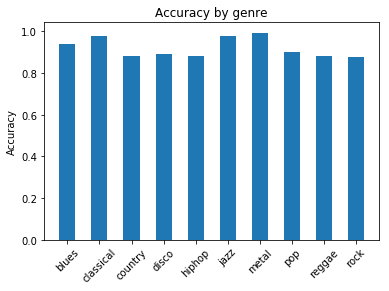

In [21]:
fig = plt_genre_acc(names, percentage)
fig.savefig('/Users/pengguo/Desktop/coms4995/Project/figures/acc_by_genre_p1.png')

## Plotting

Plot the cross-validation results.

In [48]:
def cross_validation_plot(model_gen, low, high, step, X, Y, K=10, epoches=1500, opt='adam'):
    '''
    Do 10-fold Cross Validation,
    Collect data for plotting.
    '''
    seed = 6
    kfold = KFold(n_splits=K, shuffle=True, random_state=seed)
    # lists for storing data to be plotted
    lambds = [] # Regularization parameter
    c_scores = [] # mean of cross-validation(cv) scores
    stds = [] # standard deviation of cv scores
    lambd = low
    while lambd < high + step:
        cvscores = []
        for train, test in kfold.split(X, Y):
            model = model_gen(lambd) # generate model from input function
            # Compile model
            model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
            # Fit the model
            model.fit(X[train], Y[train], nb_epoch=epoches, verbose=0)
            # evaluate the model
            scores = model.evaluate(X[test], Y[test], verbose=0)
            cvscores.append(scores[1] * 100)
        print np.mean(cvscores)
        print "%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores))
        lambds.append(lambd)
        c_scores.append(np.mean(cvscores))
        stds.append(np.std(cvscores))
        lambd += step
    return lambds, c_scores, stds


# def plt_genre_acc(names, percentage):
#     N = len(names)
    
#     ind = np.arange(N)  # the x locations for the groups
#     width = 0.5     # the width of the bars

#     fig, ax = plt.subplots()
#     rects1 = ax.bar(ind, percentage, width) #, yerr=men_std)

#     # add some text for labels, title and axes ticks
#     ax.set_ylabel('Accuracy')
#     ax.set_title('Accuracy by genre')
#     ax.set_xticks(ind)
#     ax.set_xticklabels(names, rotation=45)

#     plt.show()
#     return fig


def plotting_L2(dic):
    '''
    A wrapper of plotting L2 regularization results.
    '''
    N = len(dic['2_layer_L2'][0])
    
    ind = np.arange(N)
    width = 0.5
    
    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, dic['2_layer_L2'][1], width, yerr=dic['2_layer_L2'][2])
    
    ax.set_ylabel('Accuracy')
    ax.set_xlabel('lambda')
    ax.set_title('Model with L2 Regularization')
    ax.set_xticks(ind)
    ax.set_xticklabels(dic['2_layer_L2'][0], rotation=45)
    
    plt.show()
    fig.savefig('/Users/pengguo/Desktop/coms4995/Project/figures/part1_cls_L2.png')
    return
    

def plotting_DO(dic):
    '''
    A wrapper of plotting dropout regularization results.
    '''
    N = len(dic['2_layer_do'][0])
    
    ind = np.arange(N)
    width = 0.5
    
    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, dic['2_layer_do'][1], width, color='y', yerr=dic['2_layer_do'][2])
    
    ax.set_ylabel('Accuracy')
    ax.set_xlabel('lambda')
    ax.set_title('Model with Dropout')
    ax.set_xticks(ind)
    ax.set_xticklabels(dic['2_layer_do'][0], rotation=45)
    
    plt.show()
    fig.savefig('/Users/pengguo/Desktop/coms4995/Project/figures/part1_cls_dropout.png')

In [26]:
dic = {} # Dictionary for storing data
dic['1_layer_L2'] = cross_validation_plot(model_1_layer_L2, 0, 0.03, 0.005, X, Y)
dic['2_layer_L2'] = cross_validation_plot(model_2_layer_L2, 0, 0.03, 0.005, X, Y)
dic['2_layer_first_L2'] = cross_validation_plot(model_2_layer_first_L2, 0, 0.03, 0.005, X, Y)
dic['2_layer_last_L2'] = cross_validation_plot(model_2_layer_last_L2, 0, 0.03, 0.005, X, Y)
dic['2_layer_do'] = cross_validation_plot(model_2_layer_DR, 0, 0.5, 0.05, X, Y)

91.1
91.10% (+/- 3.56%)
87.3
87.30% (+/- 3.61%)
84.5
84.50% (+/- 2.66%)
83.5
83.50% (+/- 3.38%)
82.7
82.70% (+/- 2.72%)
81.2
81.20% (+/- 3.34%)
81.3
81.30% (+/- 3.90%)
91.4
91.40% (+/- 3.41%)
91.1
91.10% (+/- 3.18%)
88.5
88.50% (+/- 2.62%)
85.1
85.10% (+/- 3.65%)
81.9
81.90% (+/- 3.96%)
80.0
80.00% (+/- 3.32%)
78.7
78.70% (+/- 3.44%)
91.4
91.40% (+/- 2.94%)
91.4
91.40% (+/- 3.04%)
91.1
91.10% (+/- 3.56%)
90.0
90.00% (+/- 4.05%)
91.7
91.70% (+/- 3.23%)
91.1
91.10% (+/- 2.77%)
90.7
90.70% (+/- 3.90%)
90.3
90.30% (+/- 3.87%)
91.9
91.90% (+/- 2.70%)
91.6
91.60% (+/- 3.17%)
91.9
91.90% (+/- 3.36%)
91.4
91.40% (+/- 3.01%)
91.7
91.70% (+/- 3.41%)
91.3
91.30% (+/- 3.13%)
91.2
91.20% (+/- 2.82%)
91.3
91.30% (+/- 2.93%)
91.4
91.40% (+/- 4.15%)
92.3
92.30% (+/- 3.07%)
90.6
90.60% (+/- 4.08%)
91.6
91.60% (+/- 3.44%)
91.8
91.80% (+/- 2.79%)
91.9
91.90% (+/- 3.36%)
90.7
90.70% (+/- 3.07%)
91.1
91.10% (+/- 3.86%)
90.9
90.90% (+/- 3.62%)
89.9
89.90% (+/- 4.01%)


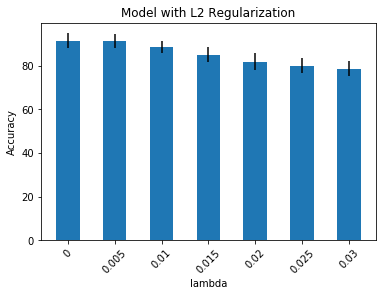

In [36]:
plotting_L2(dic)

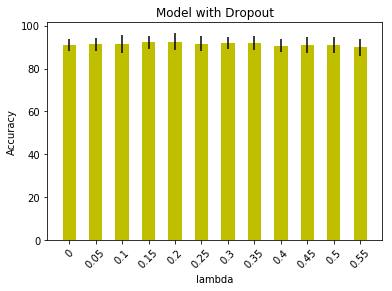

In [49]:
plotting_DO(dic)

In [44]:
dic['2_layer_do'][1][4] += 2